In [81]:
#import dependencies to read the files 
import os 
import csv 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import json
import requests

In [82]:
# File to Load
file_to_load = "Movie IMDB Rating.csv"

# Read Purchasing File and store into Pandas data frame
imdb_genre_df = pd.read_csv(file_to_load)

In [83]:
imdb_genre_df= imdb_genre_df.dropna()

In [84]:
imdb_genre_df.to_csv("Movie IMDB Rating.csv", index= False)

In [85]:
imdb_genre_df= imdb_genre_df.drop_duplicates(subset= 'Title')

In [86]:
imdb_genre_df['Genres'] = imdb_genre_df['Genre'].str.split(',').str[0]
del imdb_genre_df['Genre']
imdb_genre_df

,Title,IMDB Rating,Genres
0,7:19,5.9,Drama
1,23:59,4.6,Horror
2,9,7.1,Animation
3,21,6.8,Crime
4,46,7.4,Short
...,...,...,...
3991,Zombieland,7.6,Adventure
3992,Zoo,6.7,Drama
3993,Zoom,4.4,Action
3994,Zozo,6.6,Drama


In [92]:
imdb_genre_df= imdb_genre_df[~imdb_genre_df.Genres.str.contains('News')]
imdb_genre_df= imdb_genre_df[~imdb_genre_df.Genres.str.contains('History')]
imdb_genre_df= imdb_genre_df[~imdb_genre_df.Genres.str.contains('Game-Show')]
imdb_genre_df= imdb_genre_df[~imdb_genre_df.Genres.str.contains('Adult')]
imdb_genre_df= imdb_genre_df[~imdb_genre_df.Genres.str.contains('Reality-TV')]
imdb_genre_df= imdb_genre_df[~imdb_genre_df.Genres.str.contains('Western')]
imdb_genre_df= imdb_genre_df[~imdb_genre_df.Genres.str.contains('Sci-Fi')]
imdb_genre_df= imdb_genre_df[~imdb_genre_df.Genres.str.contains('Musical')]
imdb_genre_df= imdb_genre_df[~imdb_genre_df.Genres.str.contains('Sport')]

In [93]:
imdb_genre_df.to_excel(r'imdb genre df.xlsx', index = False)

In [94]:
groups= imdb_genre_df.groupby("Genres").mean()
groups

,IMDB Rating
Genres,
Action,5.965534
Adventure,6.093333
Animation,6.293162
Biography,6.963043
Comedy,6.157914
Crime,6.495378
Documentary,6.998017
Drama,6.411335
Family,5.762500


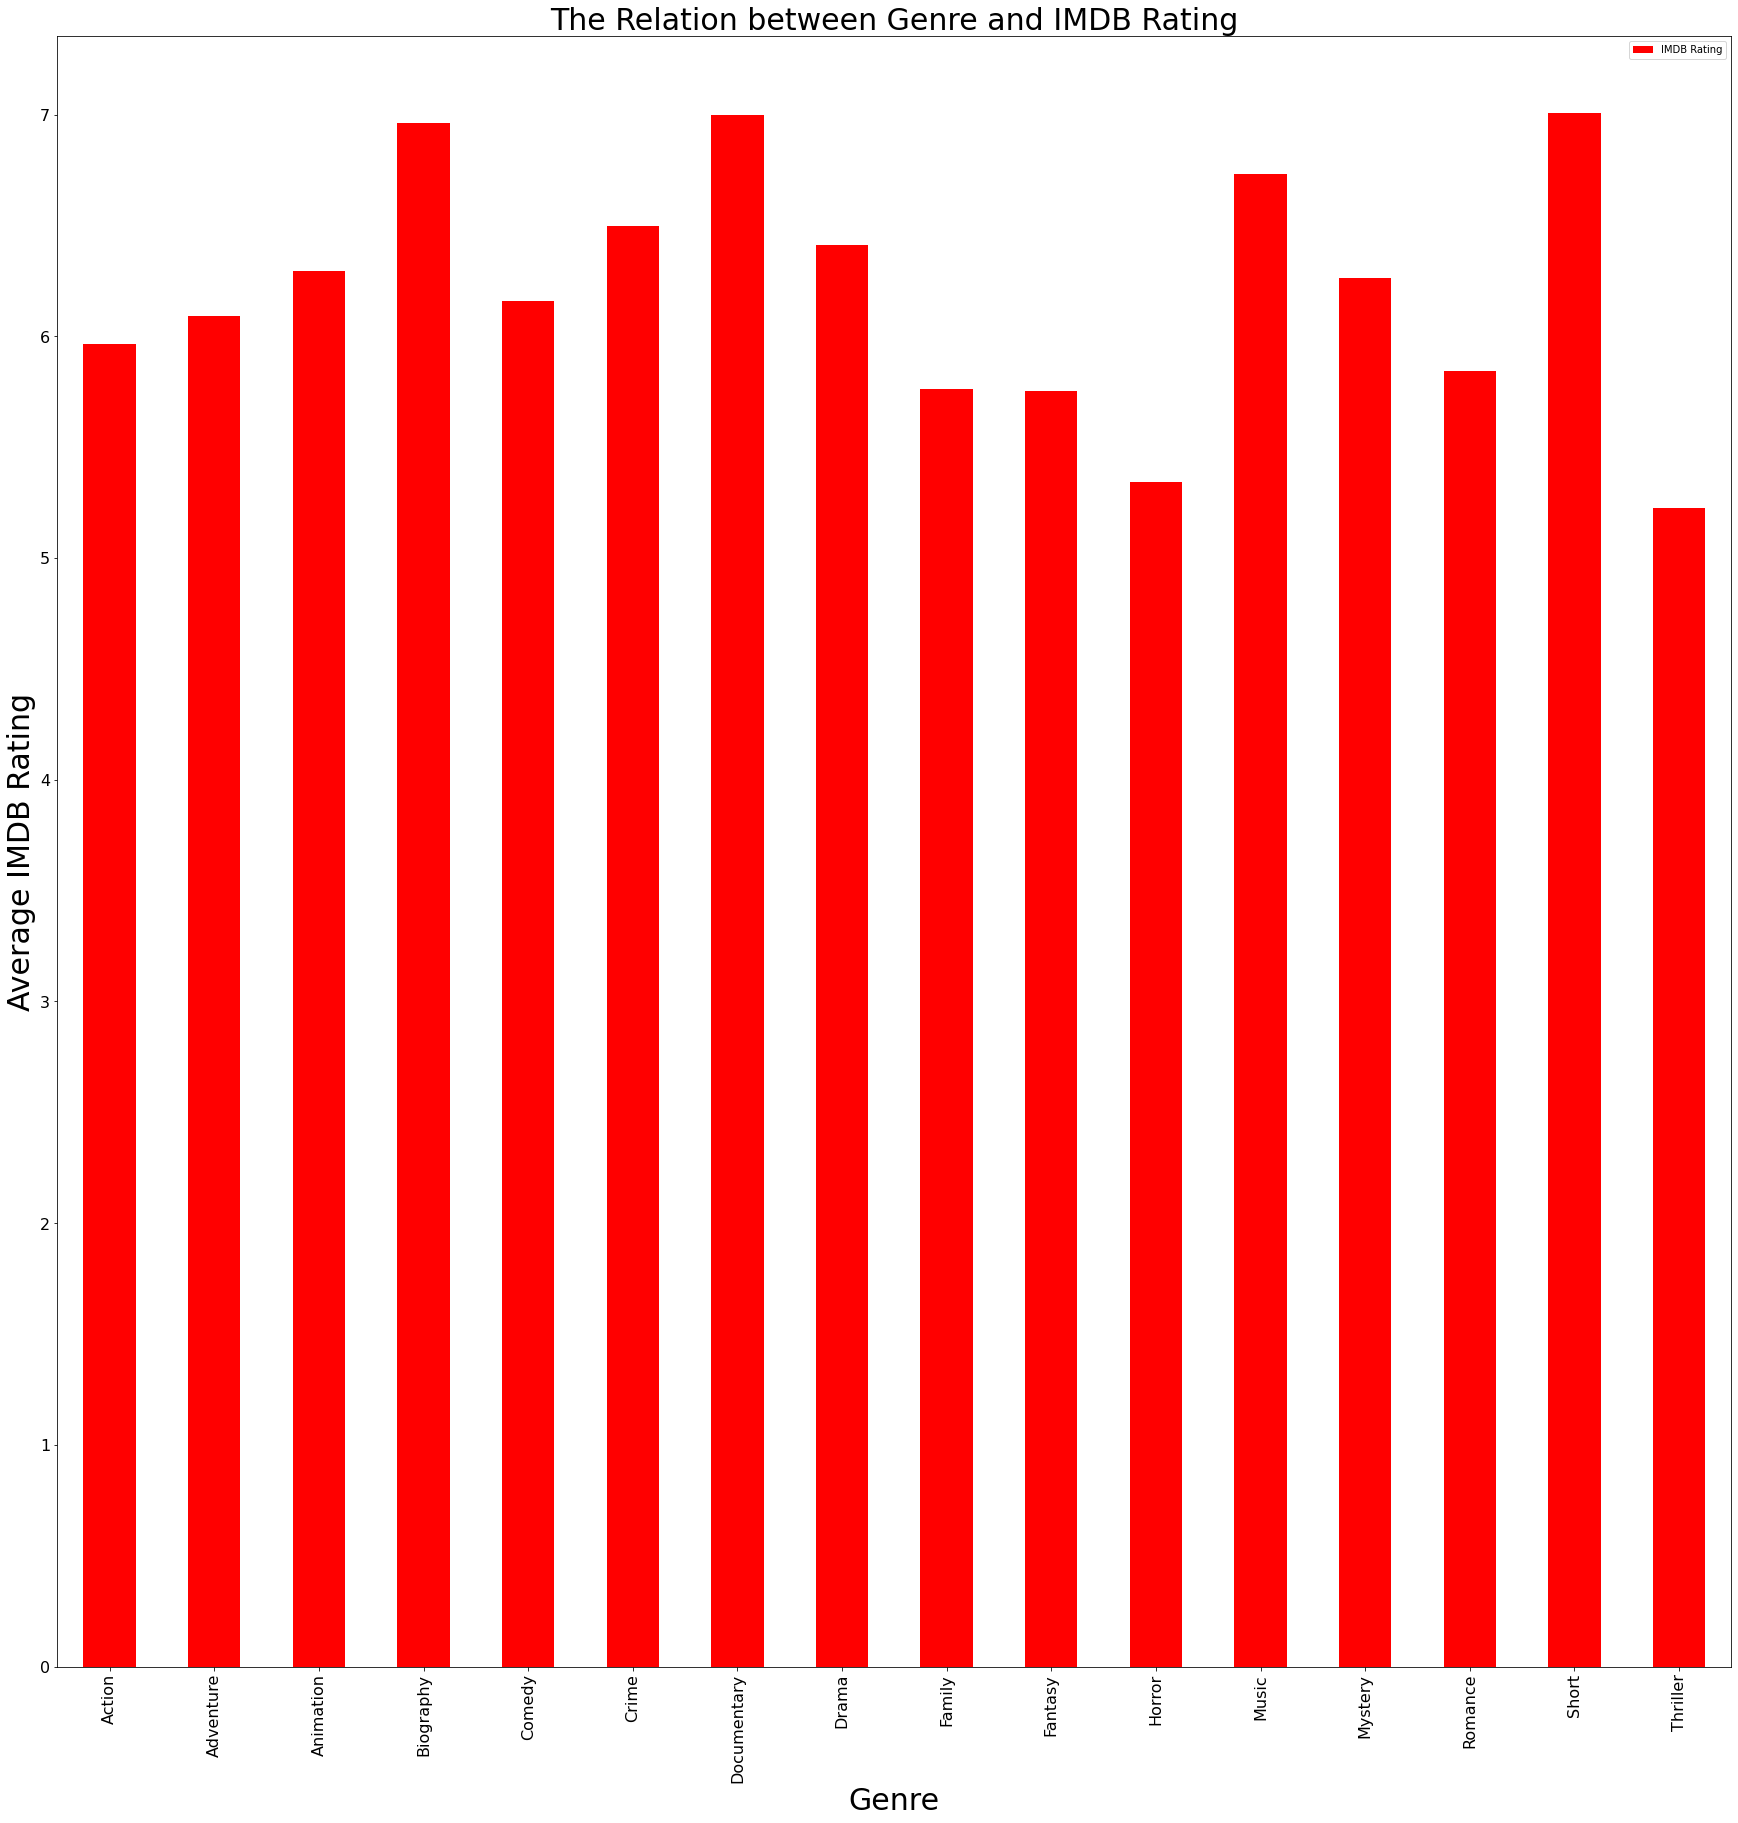

<Figure size 432x288 with 0 Axes>

In [98]:
plotting_genre_averages= groups.plot.bar(figsize=(30,30),color='r', fontsize= 16)
groups
#add titles and labels 
plt.xlabel("Genre",fontsize = 30)
plt.ylabel("Average IMDB Rating",fontsize = 30)
plt.title("The Relation between Genre and IMDB Rating",fontsize = 30)
plt.show()
plt.savefig("../Graph Folder/The Relation between Genre and IMDB Rating.png")

In [96]:
genre_popularity= imdb_genre_df['Genres'].value_counts()
genre_popularity

Comedy         1112
Drama           794
Action          618
Documentary     353
Crime           238
Animation       234
Horror          138
Biography       138
Adventure       120
Short            55
Thriller         53
Family           32
Romance          24
Mystery          20
Music            12
Fantasy          11
Name: Genres, dtype: int64

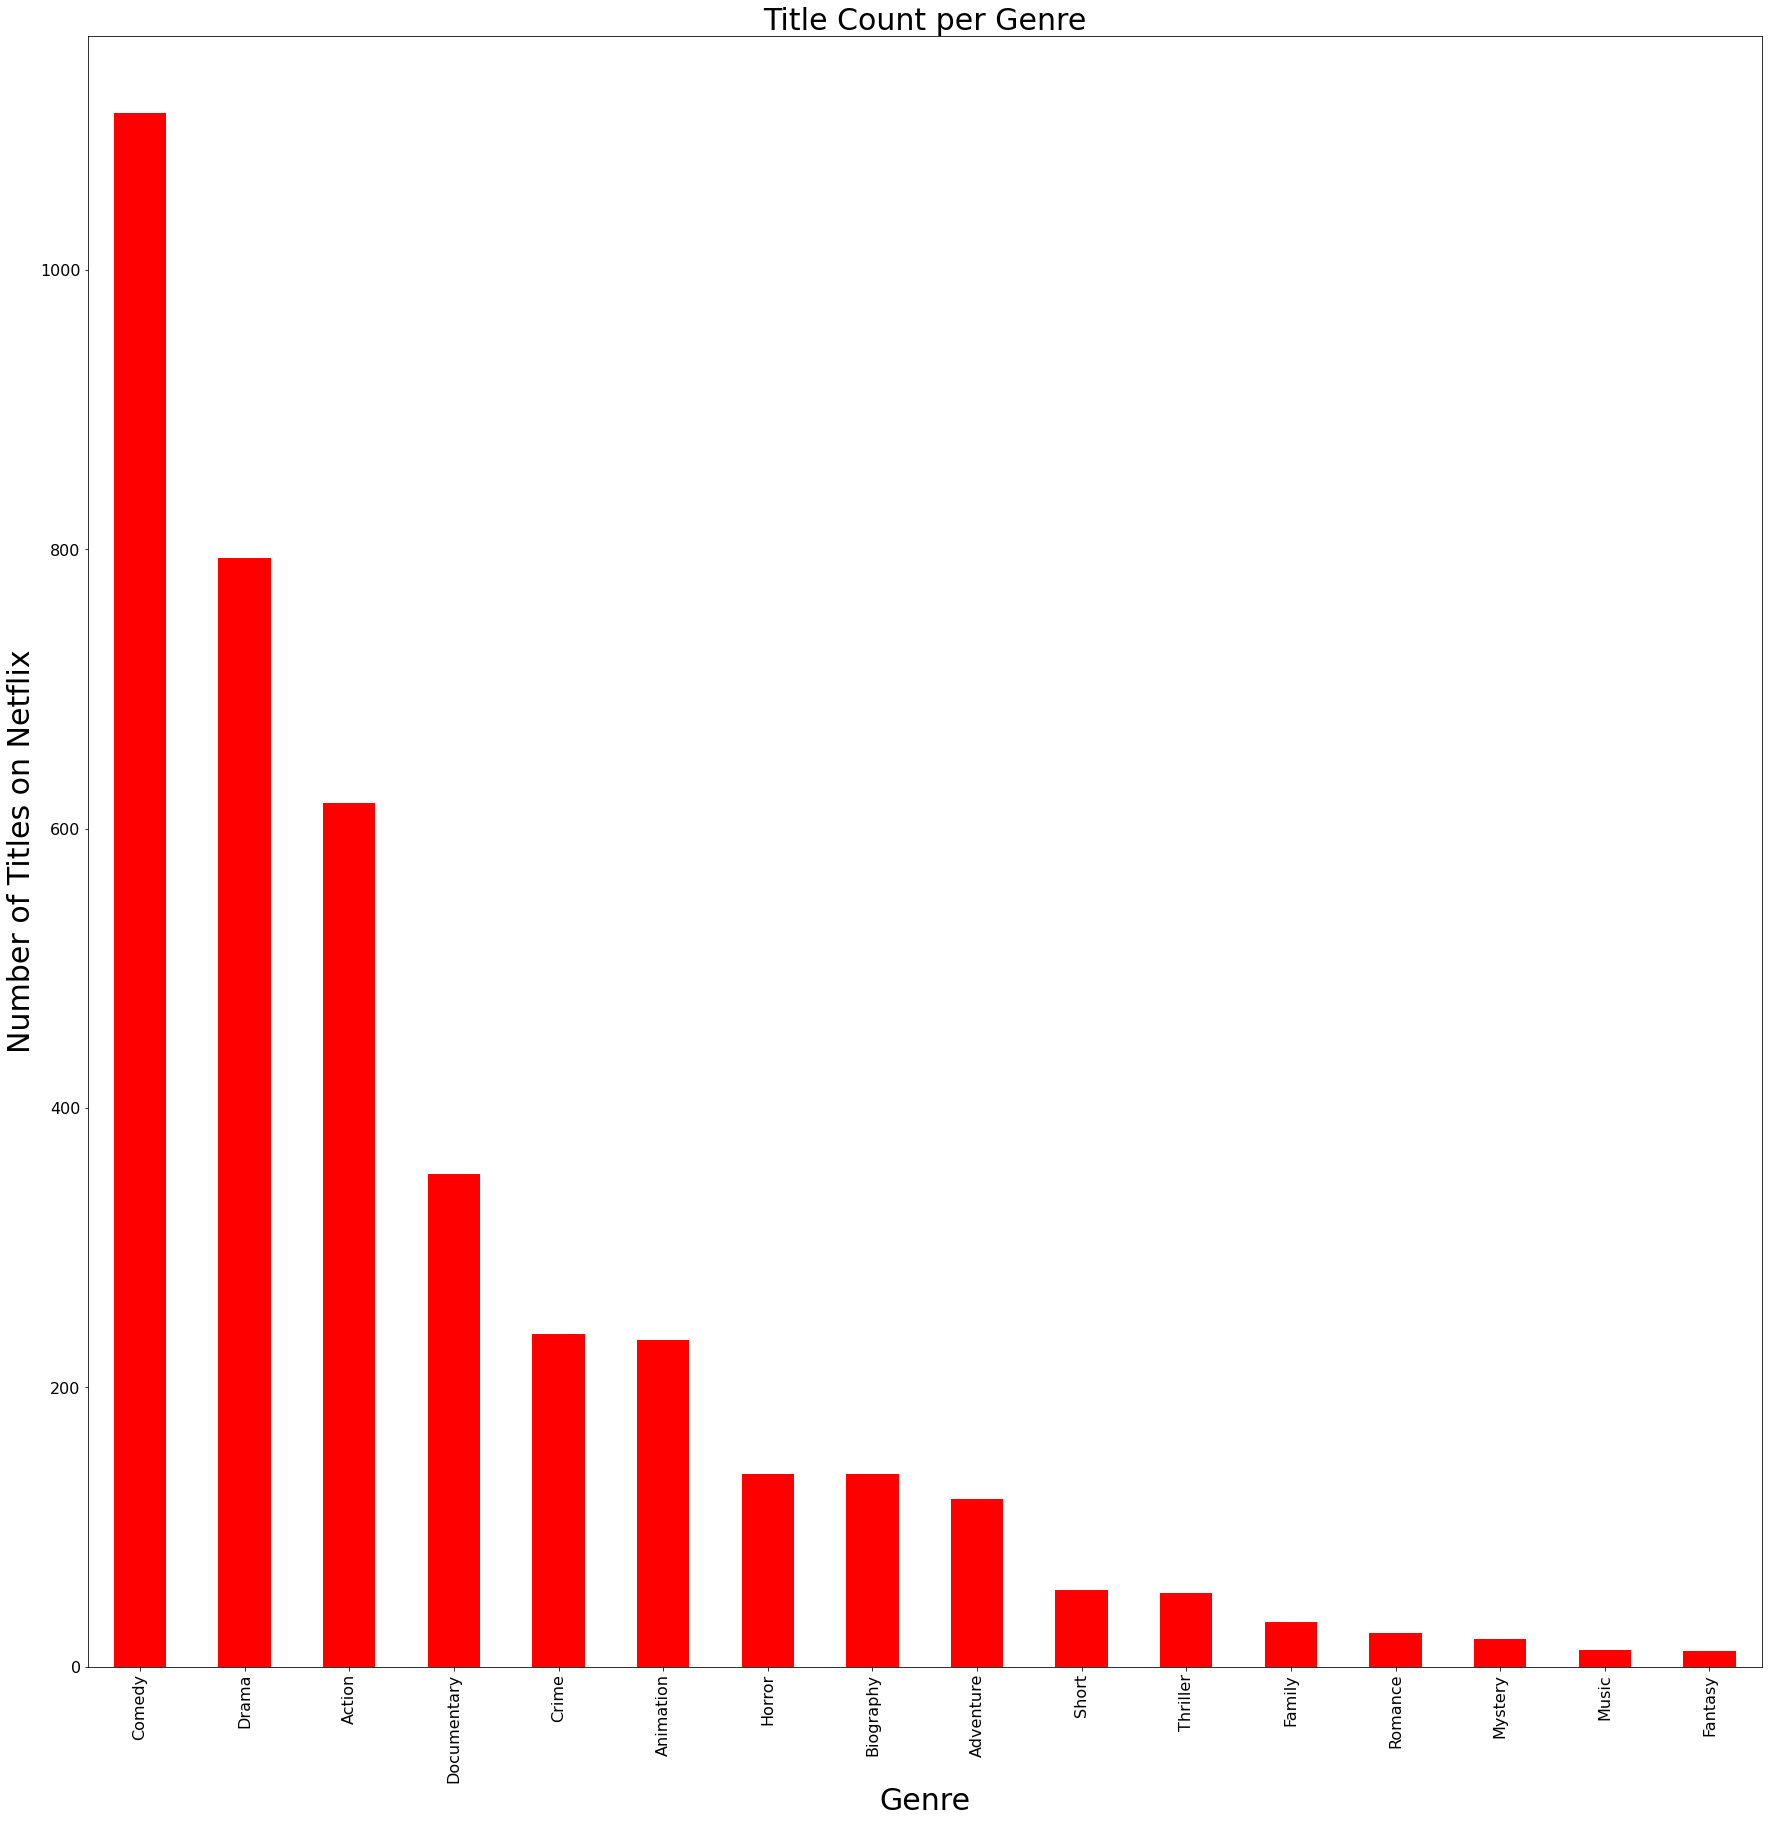

In [99]:
plotting_genre_popularity= genre_popularity.plot.bar(figsize=(30,30),color='r', fontsize= 16)
genre_popularity
#add titles and labels 
plt.xlabel("Genre",fontsize = 30)
plt.ylabel("Number of Titles on Netflix",fontsize = 30)
plt.title("Title Count per Genre",fontsize = 30)
plt.savefig("../Graph Folder/Title Count per Genre.png")
plt.show()
